In [23]:
import torch
import numpy as np

In [24]:
M = 1000
N = 64
k = 2
z = torch.rand(M, k).cuda() * 2 - 1
e = torch.rand(N, k).cuda() * 2 - 1

# (M, N)
distance = z @ e.T
print(distance.shape)

torch.Size([1000, 64])


In [28]:
log_sigma = torch.arange(-10, 4, 0.01).cuda()
sigma = torch.exp(log_sigma)
alpha = -1/(2*sigma**2)
loss = torch.mean(-torch.logsumexp(alpha[:, None, None]*distance[None, :, :], dim=2), dim=1)
loss = loss + 0.5*k*(2*log_sigma - np.log(np.e)) + np.log(N)
loss = loss.data.cpu().numpy()

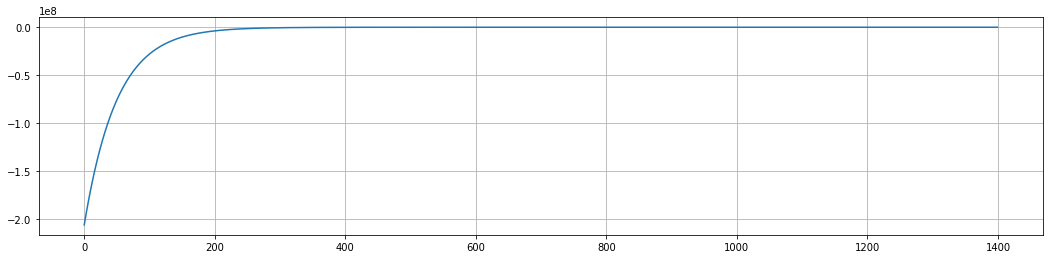

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=[18, 4])
plt.plot(loss)
plt.grid()
plt.show()